In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import datetime

### 耕地面積のデータフレーム化

In [2]:
# データフレーム読み込み
CropArea_df = pd.read_excel('CropArea_Data.xls', 
                           sheet_name='Sheet1', skiprows=7,
                           names=['年次', \
                                  '田畑_合計', '田畑_本地', '田畑_けい畔', \
                                  '田_合計', '田_本地', '田_けい畔', \
                                  '畑_合計', '畑_本地', '畑_けい畔'])
CropArea_df

,年次,田畑_合計,田畑_本地,田畑_けい畔,田_合計,田_本地,田_けい畔,畑_合計,畑_本地,畑_けい畔
0,昭.41(1966),149800,147100,2690,81000,78900,2070,68800,68200,622
1,昭.42(1967),146300,143600,2660,81100,79000,2070,65200,64600,589
2,昭.43(1968),143000,140300,2620,80500,78400,2060,62500,61900,558
3,昭.44(1969),140400,137800,2600,80000,77900,2060,60400,59900,539
4,昭.45(1970),136400,133900,2520,77900,75900,2000,58500,58000,521
5,昭.46(1971),133500,131000,2490,76300,74300,1980,57200,56700,508
6,昭.47(1972),130700,128300,2360,75100,73200,1880,55600,55100,479
7,昭.48(1973),128300,125900,2320,73500,71600,1850,54800,54300,465
8,昭.49(1974),125400,123100,2260,71600,69800,1800,53800,53300,457
9,昭.50(1975),121100,119000,2150,68700,67000,1710,52400,52000,440


In [3]:
# 年次書き換え
CropArea_df['年次'] = (CropArea_df['年次'].str[-5:-1]).astype(np.int64)
CropArea_df

,年次,田畑_合計,田畑_本地,田畑_けい畔,田_合計,田_本地,田_けい畔,畑_合計,畑_本地,畑_けい畔
0,1966,149800,147100,2690,81000,78900,2070,68800,68200,622
1,1967,146300,143600,2660,81100,79000,2070,65200,64600,589
2,1968,143000,140300,2620,80500,78400,2060,62500,61900,558
3,1969,140400,137800,2600,80000,77900,2060,60400,59900,539
4,1970,136400,133900,2520,77900,75900,2000,58500,58000,521
5,1971,133500,131000,2490,76300,74300,1980,57200,56700,508
6,1972,130700,128300,2360,75100,73200,1880,55600,55100,479
7,1973,128300,125900,2320,73500,71600,1850,54800,54300,465
8,1974,125400,123100,2260,71600,69800,1800,53800,53300,457
9,1975,121100,119000,2150,68700,67000,1710,52400,52000,440


In [4]:
CropArea_df = CropArea_df[CropArea_df['年次'] >= 2000]
CropArea_df

,年次,田畑_合計,田畑_本地,田畑_けい畔,田_合計,田_本地,田_けい畔,畑_合計,畑_本地,畑_けい畔
34,2000,87500,86000,1460,51400,50300,1170,36000,35700,289
35,2001,86600,85100,1430,50500,49400,1150,36000,35800,289
36,2002,86000,84600,1420,49500,48400,1120,36500,36200,294
37,2003,85800,84300,1410,49000,47800,1110,36800,36500,300
38,2004,85400,84000,1390,48000,46900,1090,37500,37200,308
39,2005,84800,83400,1380,47100,46000,1070,37700,37400,312
40,2006,84200,82900,1370,46600,45600,1060,37600,37300,312
41,2007,83000,81600,1320,46000,45000,1010,37000,36700,308
42,2008,81400,80000,1310,45000,44000,1000,36400,36100,304
43,2009,80500,79200,1300,44400,43400,1000,36100,35800,301


### 農業人口のデータフレーム化

In [5]:
# データフレーム読み込み
skiprows = 15
rows_to_read = 47
population_2020_df = pd.read_csv('population_2020.csv', 
                                    skiprows=skiprows, nrows=rows_to_read, encoding='cp932', 
                                    names=['都道府県', \
                                            '総数', '就業者総数（有職）', '管理的職業従事者', '専門的・技術的職業従事者', '事務従事者', \
                                            '販売従事者', 'サービス職業従事者', '保安職業従事者', '農林漁業従事者', '生産工程従事者', \
                                            '輸送・機械運転従事者', '建設・採掘従事者', '運搬・清掃・包装等従事者', '職業不詳', '無職', '不詳'])

year = 2020
year_array = []
for _ in range(47):
    year_array.append(year)
population_2020_df['年次'] = year_array

# 埼玉県のデータを取り出す
df_1 = population_2020_df[population_2020_df['都道府県'].str.contains('埼')]

#population_2020_df
df_1

,都道府県,総数,就業者総数（有職）,管理的職業従事者,専門的・技術的職業従事者,事務従事者,販売従事者,サービス職業従事者,保安職業従事者,農林漁業従事者,生産工程従事者,輸送・機械運転従事者,建設・採掘従事者,運搬・清掃・包装等従事者,職業不詳,無職,不詳,年次
10,11埼玉県 Saitama,6305310,3319393,56658,577951,729383,437372,364176,69177,49806,392204,121903,141947,279066,99750,2192966,792951,2020


In [6]:
# データフレーム読み込み
skiprows = 15
rows_to_read = 47
population_2015_df = pd.read_csv('population_2015.csv', 
                                    skiprows=skiprows, nrows=rows_to_read, encoding='cp932', 
                                    names=['都道府県', \
                                            '総数', '就業者総数（有職）', '管理的職業従事者', '専門的・技術的職業従事者', '事務従事者', \
                                            '販売従事者', 'サービス職業従事者', '保安職業従事者', '農林漁業従事者', '生産工程従事者', \
                                            '輸送・機械運転従事者', '建設・採掘従事者', '運搬・清掃・包装等従事者', '分類不能の職業', '無職', '不詳'])

year = 2015
year_array = []
for _ in range(47):
    year_array.append(year)
population_2015_df['年次'] = year_array

# 埼玉県のデータを取り出す
df_2 = population_2015_df[population_2015_df['都道府県'].str.contains('埼')]

#population_2020_df
df_2

,都道府県,総数,就業者総数（有職）,管理的職業従事者,専門的・技術的職業従事者,事務従事者,販売従事者,サービス職業従事者,保安職業従事者,農林漁業従事者,生産工程従事者,輸送・機械運転従事者,建設・採掘従事者,運搬・清掃・包装等従事者,分類不能の職業,無職,不詳,年次
9,１１ 埼 玉,6258390.0,3423624.0,71419.0,517580.0,705114.0,471465.0,361725.0,67158.0,54647.0,423386.0,123695.0,151440.0,253424.0,222571.0,2437495.0,397271.0,2015


In [7]:
# データフレーム読み込み
skiprows = 9
rows_to_read = 47
population_2010_df = pd.read_csv('population_2010.csv', 
                                    skiprows=skiprows, nrows=rows_to_read, encoding='cp932', 
                                    names=['HB', '都道府県', \
                                            '総数', '就業者総数（有職）', '管理的職業従事者', '専門的・技術的職業従事者', '事務従事者', \
                                            '販売従事者', 'サービス職業従事者', '保安職業従事者', '農林漁業従事者', '生産工程従事者', \
                                            '輸送・機械運転従事者', '建設・採掘従事者', '運搬・清掃・包装等従事者', '分類不能の職業', '無職', '不詳'])

year = 2010
year_array = []
for _ in range(47):
    year_array.append(year)
population_2010_df['年次'] = year_array

# 埼玉県のデータを取り出す
df_3 = population_2010_df[population_2010_df['都道府県'].str.contains('埼')]

#population_2020_df
df_3

,HB,都道府県,総数,就業者総数（有職）,管理的職業従事者,専門的・技術的職業従事者,事務従事者,販売従事者,サービス職業従事者,保安職業従事者,農林漁業従事者,生産工程従事者,輸送・機械運転従事者,建設・採掘従事者,運搬・清掃・包装等従事者,分類不能の職業,無職,不詳,年次
10,HS,１１ 埼 玉,6158556,3431010,70979,473400,703785,499140,353630,64814,58349,457297,126525,154105,234373,234613,2382832,344714,2010


In [8]:
# データフレーム読み込み
skiprows = 7
rows_to_read = 47
population_2005_df = pd.read_csv('population_2005.csv', 
                                    skiprows=skiprows, nrows=rows_to_read, encoding='cp932', 
                                    names=['都道府県', \
                                            '総数', '就業者総数（有職）', '専門的・技術的職業従事者', '管理的職業従事者', '事務従事者', \
                                            '販売従事者', 'サービス職業従事者', '保安職業従事者', '農林漁業従事者', '運輸・通信従事者', \
                                            '生産工程・労務従事者', '分類不能の職業', '無職', '不詳'])

year = 2005
year_array = []
for _ in range(47):
    year_array.append(year)
population_2005_df['年次'] = year_array

# 埼玉県のデータを取り出す
df_4 = population_2005_df[population_2005_df['都道府県'].str.contains('埼')]

#population_2020_df
df_4

,都道府県,総数,就業者総数（有職）,専門的・技術的職業従事者,管理的職業従事者,事務従事者,販売従事者,サービス職業従事者,保安職業従事者,農林漁業従事者,運輸・通信従事者,生産工程・労務従事者,分類不能の職業,無職,不詳,年次
10,11 埼 玉,5992478,3471700,458470,75643,751323,540362,309225,62792,77167,126906,985654,84158,2344733,176045,2005


In [9]:
# データフレーム読み込み
skiprows = 10
rows_to_read = 47
population_2000_df = pd.read_csv('population_2000.csv', 
                                    skiprows=skiprows, nrows=rows_to_read, encoding='cp932', 
                                    names=['都道府県', \
                                            '総数', '就業者総数（有職）', '専門的・技術的職業従事者', '管理的職業従事者', '事務従事者', \
                                            '販売従事者', 'サービス職業従事者', '保安職業従事者', '農林漁業従事者', '運輸・通信従事者', \
                                            '生産工程・労務従事者', '分類不能の職業', '無職'])

year = 2000
year_array = []
for _ in range(47):
    year_array.append(year)
population_2000_df['年次'] = year_array

# 埼玉県のデータを取り出す
df_5 = population_2000_df[population_2000_df['都道府県'].str.contains('埼')]

#population_2020_df
df_5

,都道府県,総数,就業者総数（有職）,専門的・技術的職業従事者,管理的職業従事者,事務従事者,販売従事者,サービス職業従事者,保安職業従事者,農林漁業従事者,運輸・通信従事者,生産工程・労務従事者,分類不能の職業,無職,年次
10,１１ 埼 玉,5855848,3503190,449143,90906,755225,570694,272028,59695,85313,133244,1028820,58122,2250345,2000


In [10]:
# 年度，農林漁業従事者以外のコラムをドロップ
columns_to_keep = ['年次', '農林漁業従事者']

df_1 = df_1.drop(columns=[col for col in df_1.columns if col not in columns_to_keep])
df_2 = df_2.drop(columns=[col for col in df_2.columns if col not in columns_to_keep])
df_3 = df_3.drop(columns=[col for col in df_3.columns if col not in columns_to_keep])
df_4 = df_4.drop(columns=[col for col in df_4.columns if col not in columns_to_keep])
df_5 = df_5.drop(columns=[col for col in df_5.columns if col not in columns_to_keep])

Workers_df1 = pd.concat([df_1, df_2, df_3, df_4, df_5])

Workers_df = Workers_df1.iloc[::-1]  # インデックスを逆順にする

Workers_df

,農林漁業従事者,年次
10,85313.0,2000
10,77167.0,2005
10,58349.0,2010
9,54647.0,2015
10,49806.0,2020


### グラフの作成

In [11]:
Workers_df.reset_index(drop=True, inplace=True)
CropArea_df.reset_index(drop=True, inplace=True)

# 相関係数算出
correlation_coefficient1 = CropArea_df['年次'].corr(CropArea_df['田畑_合計'])
regression1 = np.polyfit(CropArea_df['年次'], CropArea_df['田畑_合計'], 1)
regression_line1 = np.poly1d(regression1)

correlation_coefficient2 = Workers_df['年次'].corr(Workers_df['農林漁業従事者'])
regression2 = np.polyfit(Workers_df['年次'], Workers_df['農林漁業従事者'], 1)
regression_line2 = np.poly1d(regression2)

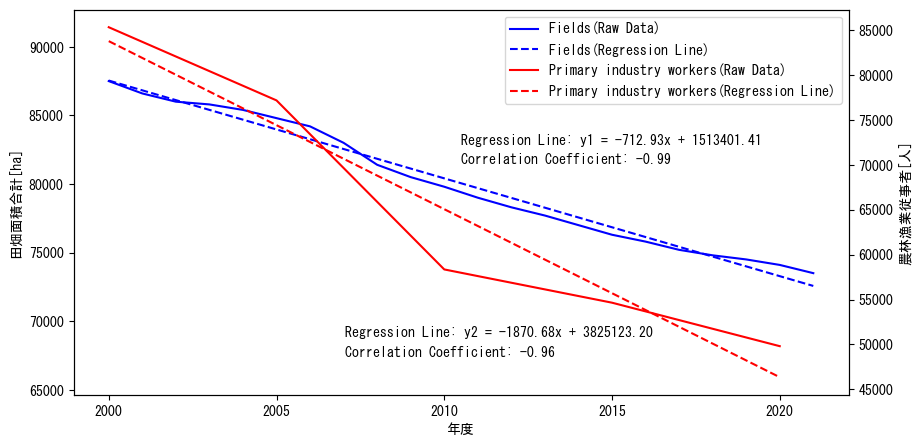

In [12]:
# 田畑面積の推移
plt.rcParams['font.family'] = 'MS Gothic'
fig, ax1 = plt.subplots(figsize=(10,5))


# 第1軸（田畑面積）
ax1.plot(CropArea_df['年次'], CropArea_df['田畑_合計'], color='b', label='Fields(Raw Data)')
ax1.plot(CropArea_df['年次'], regression_line1(CropArea_df['年次']), color='b', linestyle='dashed', label='Fields(Regression Line)')

x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min * 0.9, y_max * 1.05)
ax1.set_xlabel('年度')
ax1.set_ylabel('田畑面積合計[ha]')


# 第2軸（農林漁業従事者）
ax2 = ax1.twinx()
ax2.plot(Workers_df['年次'], Workers_df['農林漁業従事者'], color='r', label='Primary industry workers(Raw Data)')
ax2.plot(Workers_df['年次'], regression_line2(Workers_df['年次']), color='r', linestyle='dashed', label='Primary industry workers(Regression Line)')

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min * 0.9, y_max * 1.05)
ax2.set_ylabel('農林漁業従事者[人]')


x_ticks = [2000, 2005, 2010, 2015, 2020]
x_labels = ['2000', '2005', '2010', '2015', '2020']
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=90)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.text(0.5, 0.6, f'Correlation Coefficient: {correlation_coefficient1:.2f}', color='black', transform=plt.gca().transAxes)
plt.text(0.5, 0.65, f'Regression Line: y1 = {regression1[0]:.2f}x + {regression1[1]:.2f}', color='black', transform=plt.gca().transAxes)
plt.text(0.35, 0.1, f'Correlation Coefficient: {correlation_coefficient2:.2f}', color='black', transform=plt.gca().transAxes)
plt.text(0.35, 0.15, f'Regression Line: y2 = {regression2[0]:.2f}x + {regression2[1]:.2f}', color='black', transform=plt.gca().transAxes)

plt.savefig("fig\CropArea_and_Workers")

In [13]:
# 抽出する年度
year_to_check = [2000, 2005, 2010, 2015, 2020]
CropCheck_df = CropArea_df[CropArea_df['年次'].isin(year_to_check)]

Workers_df.reset_index(drop=True, inplace=True)
CropCheck_df.reset_index(drop=True, inplace=True)
CropCheck_df.drop(columns='年次', inplace=True)

# データフレーム結合
df_merged = pd.concat([Workers_df, CropCheck_df], axis=1)

# 相関係数算出
correlation_coefficient = df_merged['農林漁業従事者'].corr(df_merged['田畑_合計'])

regression = np.polyfit(df_merged['農林漁業従事者'], df_merged['田畑_合計'], 1)
regression_line = np.poly1d(regression)

C:\Users\human\AppData\Local\Temp\ipykernel_86820\1895410390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CropCheck_df.drop(columns='年次', inplace=True)


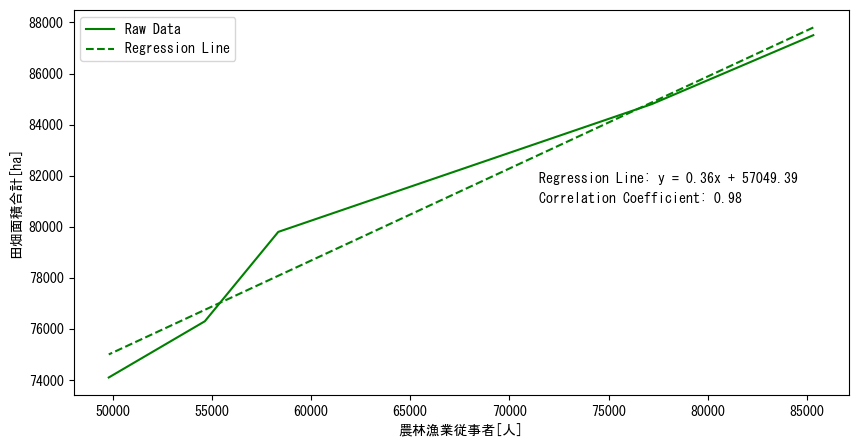

In [14]:
# 田畑面積の推移
plt.rcParams['font.family'] = 'MS Gothic'
fig = plt.figure(figsize=(10,5))


# 第1軸（田畑面積）
plt.plot(Workers_df['農林漁業従事者'], CropCheck_df['田畑_合計'], color='g', label='Raw Data')
plt.plot(df_merged['農林漁業従事者'], regression_line(df_merged['農林漁業従事者']), color='g',linestyle='dashed', label='Regression Line')

plt.xlabel('農林漁業従事者[人]')
plt.ylabel('田畑面積合計[ha]')

# 相関係数と回帰式をグラフに表示
plt.text(0.6, 0.55, f'Regression Line: y = {regression[0]:.2f}x + {regression[1]:.2f}', color='black', transform=plt.gca().transAxes)
plt.text(0.6, 0.5, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='black', transform=plt.gca().transAxes)

plt.legend()
plt.savefig("fig\CropArea_vs_Workers")
plt.show()